In [1]:
name = "applications/cantilever"
fname = "cantilever.vtk"

image_size = 256

magnitude_x = 0
magnitude_y = -50

device = "cpu"
use_ema = True

model_checkpoint_path = "results/model-213/"

In [2]:
from pathlib import Path
namepath = Path(name)
fnamepath = Path(fname)

In [3]:
from PIL import Image

def crop_image(image_path, bounds):
    image = Image.open(image_path)
    image = image.crop(bounds)
    image.save(image_path)

def find_image_bounds(image_path):
    # common_config = "-2 --color-map binary --no-scalar-bars --no-axes --window-size {},{} --off-screen".format(image_size, image_size)
    # os.system("sfepy-view box.mesh -f 1:vs {} --outline -o {}".format(common_config, image_path))
    image = Image.open(image_path)
    # find the bounding box of the geometry by finding the first non-white pixel
    image_data = image.load()
    left = 0
    right = image.size[0]
    top = 0
    bottom = image.size[1]
    for x in range(image.size[0]):
        for y in range(image.size[1]):
            if image_data[x, y] != (255, 255, 255):
                left = x
                break
        if left != 0:
            break
    for x in range(image.size[0] - 1, -1, -1):
        for y in range(image.size[1]):
            if image_data[x, y] != (255, 255, 255):
                right = x
                break
        if right != image.size[0]:
            break
    for y in range(image.size[1]):
        for x in range(image.size[0]):
            if image_data[x, y] != (255, 255, 255):
                top = y
                break
        if top != 0:
            break
    for y in range(image.size[1] - 1, -1, -1):
        for x in range(image.size[0]):
            if image_data[x, y] != (255, 255, 255):
                bottom = y
                break
        if bottom != image.size[1]:
            break
    return left, top, right, bottom

In [4]:
from datagen.custom_plotter import plot

In [5]:
!cd {name} && sfepy-run {fname}.py

Traceback (most recent call last):
  File "/home/namanwsl/anaconda3/envs/fea/bin/sfepy-run", line 11, in <module>
    sys.exit(main())
  File "/home/namanwsl/anaconda3/envs/fea/lib/python3.8/site-packages/sfepy/scripts/simple.py", line 228, in main
    conf = ProblemConf.from_file_and_options(filename_in, options,
  File "/home/namanwsl/anaconda3/envs/fea/lib/python3.8/site-packages/sfepy/base/conf.py", line 395, in from_file_and_options
    obj = ProblemConf.from_file(filename, required=required, other=other,
  File "/home/namanwsl/anaconda3/envs/fea/lib/python3.8/site-packages/sfepy/base/conf.py", line 362, in from_file
    funmod = import_file(filename, package_name=False)
  File "/home/namanwsl/anaconda3/envs/fea/lib/python3.8/site-packages/sfepy/base/base.py", line 152, in import_file
    mod = __import__(name)
ModuleNotFoundError: No module named 'cantilever.vtk'; 'cantilever' is not a package


In [6]:
# !cd cantilever && sfepy-view regions.vtk -2 -f Constraint:vs --color-map binary --no-scalar-bars --no-axes --window-size 756,756 --off-screen -o constraint.png
# !cd cantilever && sfepy-view regions.vtk -2 -f Force:vs --color-map binary --no-scalar-bars --no-axes --window-size 756,756 --off-screen -o force.png
# !cd cantilever && sfepy-view cantilever.vtk -2 -f u:vs:c0 --color-map binary --no-scalar-bars --no-axes --window-size 756,756 --off-screen -o displacement_x.png
# !cd cantilever && sfepy-view cantilever.vtk -2 -f u:vs:c1 --color-map binary --no-scalar-bars --no-axes --window-size 756,756 --off-screen -o displacement_y.png
# !cd cantilever && sfepy-view cantilever.vtk -2 -f 0:vs --color-map binary --no-scalar-bars --no-axes --window-size 756,756 --off-screen -o geometry.png
# !cd {name} && sfepy-view {fname}.vtk -2 -f 0:vs --color-map binary --no-scalar-bars --no-axes --window-size 756,756 --off-screen --outline -o outline.png
plot(filenames=[str(namepath / fnamepath)], fields = [("0", "vs")], window_size=(756, 756), outline=True, screenshot=str(namepath / "outline.png"))

mesh from applications/cantilever/cantilever.vtk:
  points:  2464
  cells:   4686
  bounds:  [(0.0, 1.0), (0.4, 0.6), (0.0, 0.0)]
  scalars: node_groups, mat_id
  vectors: u
  steps:   1
plot 0: None(step 0)


/home/namanwsl/anaconda3/envs/fea/lib/python3.8/site-packages/pyvista/jupyter/notebook.py:33: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


KeyboardInterrupt: 

mesh from applications/cantilever/cantilever.vtk:
  points:  2464
  cells:   4686
  bounds:  [(0.0, 1.0), (0.4, 0.6), (0.0, 0.0)]
  scalars: node_groups, mat_id
  vectors: u
  steps:   1
plot 0: None(step 0)


/home/namanwsl/anaconda3/envs/fea/lib/python3.8/site-packages/pyvista/jupyter/notebook.py:33: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


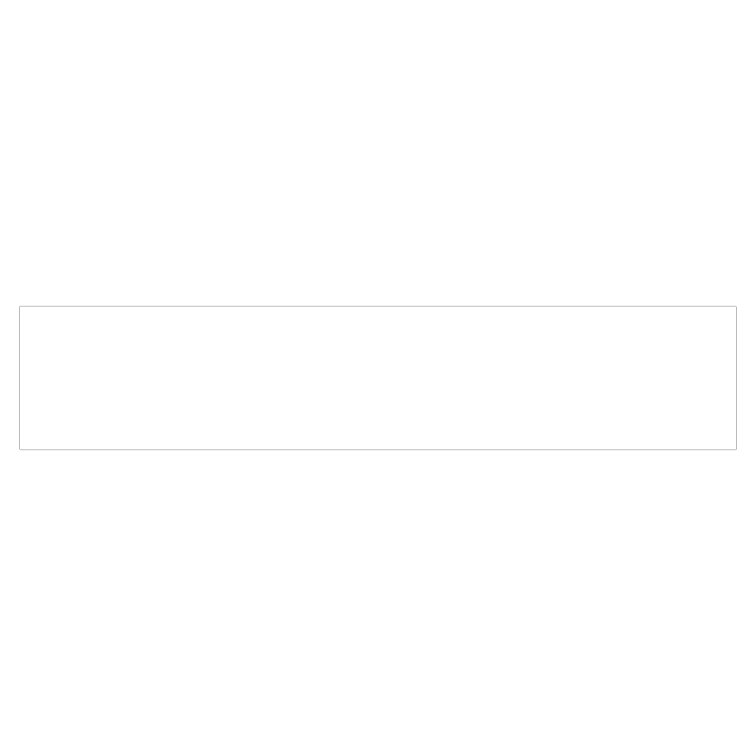

saved: applications/cantilever/outline.png
mesh from applications/cantilever/cantilever.vtk:
  points:  2464
  cells:   4686
  bounds:  [(0.0, 1.0), (0.4, 0.6), (0.0, 0.0)]
  scalars: node_groups, mat_id
  vectors: u
  steps:   1
plot 0: None(step 0)


/home/namanwsl/anaconda3/envs/fea/lib/python3.8/site-packages/pyvista/jupyter/notebook.py:33: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


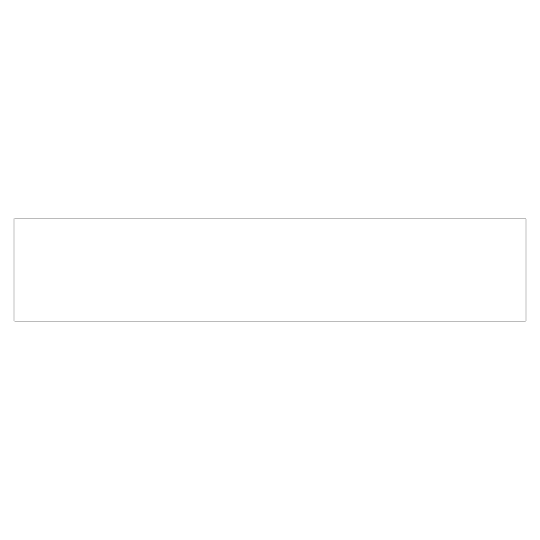

saved: applications/cantilever/outline.png


In [ ]:
# !cd {name} && sfepy-view {fname}.vtk -2 -f 0:vs --color-map binary --no-scalar-bars --no-axes --window-size 756,756 --off-screen --outline -o outline.png
plot(filenames=[str(namepath / fnamepath)], fields = [("0", "vs")], window_size=(756, 756), outline=True, screenshot=str(namepath / "outline.png"))
left, top, right, bottom = find_image_bounds(f"{name}/outline.png")
image_size_rec = 512
max_size = max(right - left, bottom - top)
modified_image_size = round(
    image_size_rec / (max_size / 756)
)
# !cd {name} && sfepy-view {fname}.vtk -2 -f 0:vs --color-map binary --no-scalar-bars --no-axes --window-size {modified_image_size},{modified_image_size} --off-screen --outline -o outline.png
plot(filenames=[str(namepath / fnamepath)], fields = [("0", "vs")], window_size=(modified_image_size, modified_image_size), outline=True, screenshot=str(namepath / "outline.png"))
left, top, right, bottom = find_image_bounds(f"{name}/outline.png")
lbound, ubound = (left, right) if right > bottom else (top, bottom)
bounds = (lbound, lbound, ubound, ubound)

mesh from applications/cantilever/regions.vtk:
  points:  2464
  cells:   4686
  bounds:  [(0.0, 1.0), (0.4, 0.6), (0.0, 0.0)]
  scalars: Omega, Constraint, Force, node_groups, mat_id
  steps:   1
plot 0: Constraint(step 0)


/home/namanwsl/anaconda3/envs/fea/lib/python3.8/site-packages/pyvista/jupyter/notebook.py:33: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


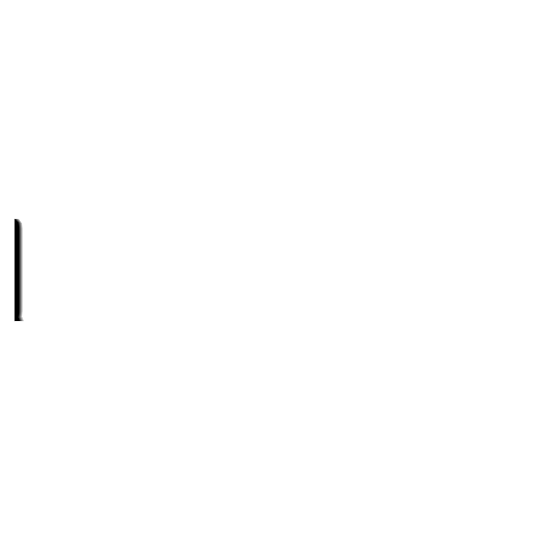

/home/namanwsl/anaconda3/envs/fea/lib/python3.8/site-packages/pyvista/jupyter/notebook.py:33: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


saved: applications/cantilever/constraint.png
mesh from applications/cantilever/regions.vtk:
  points:  2464
  cells:   4686
  bounds:  [(0.0, 1.0), (0.4, 0.6), (0.0, 0.0)]
  scalars: Omega, Constraint, Force, node_groups, mat_id
  steps:   1
plot 0: Force(step 0)


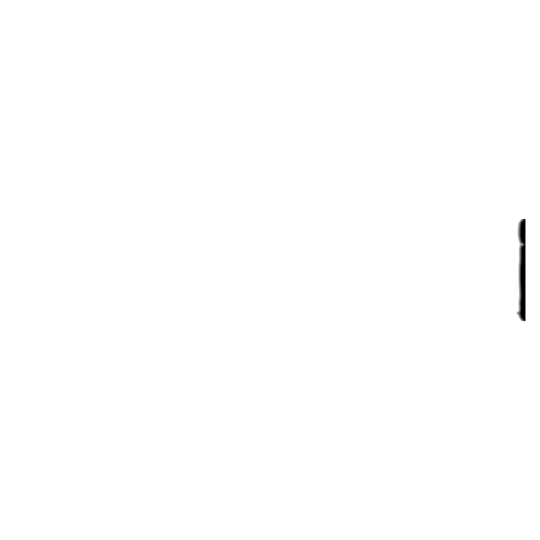

/home/namanwsl/anaconda3/envs/fea/lib/python3.8/site-packages/pyvista/jupyter/notebook.py:33: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


saved: applications/cantilever/force.png
mesh from applications/cantilever/cantilever.vtk:
  points:  2464
  cells:   4686
  bounds:  [(0.0, 1.0), (0.4, 0.6), (0.0, 0.0)]
  scalars: node_groups, mat_id
  vectors: u
  steps:   1
plot 0: u_0(step 0)


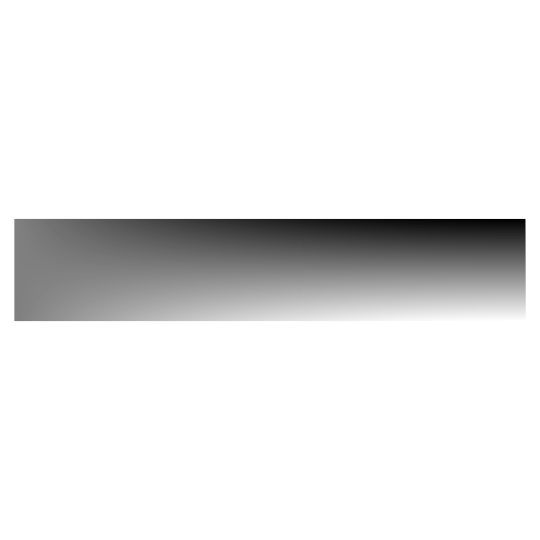

/home/namanwsl/anaconda3/envs/fea/lib/python3.8/site-packages/pyvista/jupyter/notebook.py:33: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


saved: applications/cantilever/displacement_x.png
mesh from applications/cantilever/cantilever.vtk:
  points:  2464
  cells:   4686
  bounds:  [(0.0, 1.0), (0.4, 0.6), (0.0, 0.0)]
  scalars: node_groups, mat_id
  vectors: u
  steps:   1
plot 0: u_1(step 0)


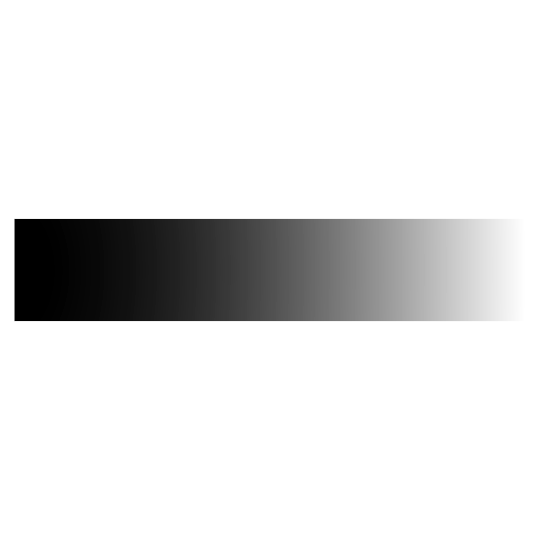

/home/namanwsl/anaconda3/envs/fea/lib/python3.8/site-packages/pyvista/jupyter/notebook.py:33: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


saved: applications/cantilever/displacement_y.png
mesh from applications/cantilever/cantilever.vtk:
  points:  2464
  cells:   4686
  bounds:  [(0.0, 1.0), (0.4, 0.6), (0.0, 0.0)]
  scalars: node_groups, mat_id
  vectors: u
  steps:   1
plot 0: None(step 0)


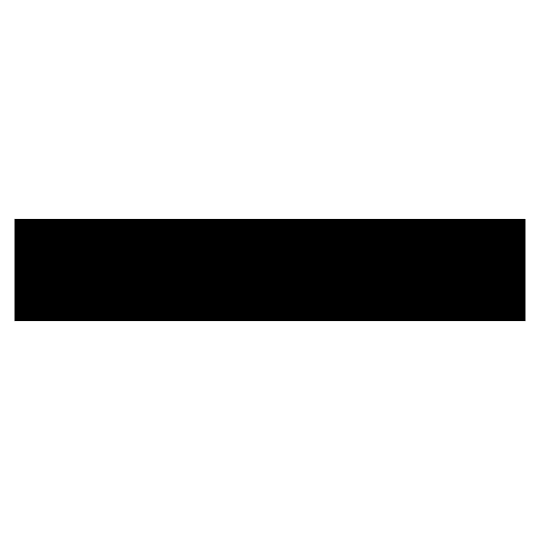

saved: applications/cantilever/geometry.png


In [ ]:
# !cd {name} && sfepy-view regions.vtk -2 -f Constraint:vs --color-map binary --no-scalar-bars --no-axes --window-size {modified_image_size},{modified_image_size} --off-screen -o constraint.png
plot(filenames=[str(namepath / "regions.vtk")], fields = [("Constraint", "vs")], window_size=(modified_image_size, modified_image_size), screenshot=str(namepath / "constraint.png"))
plot(filenames=[str(namepath / "regions.vtk")], fields = [("Force", "vs")], window_size=(modified_image_size, modified_image_size), screenshot=str(namepath / "force.png"))
# !cd {name} && sfepy-view regions.vtk -2 -f Force:vs --color-map binary --no-scalar-bars --no-axes --window-size {modified_image_size},{modified_image_size} --off-screen -o force.png
# !cd {name} && sfepy-view {fname}.vtk -2 -f u:vs:c0 --color-map binary --no-scalar-bars --no-axes --window-size {modified_image_size},{modified_image_size} --off-screen -o displacement_x.png
plot(filenames=[str(namepath / fnamepath)], fields = [("u", "c0")], window_size=(modified_image_size, modified_image_size), screenshot=str(namepath / "displacement_x.png"))
plot(filenames=[str(namepath / fnamepath)], fields = [("u", "c1")], window_size=(modified_image_size, modified_image_size), screenshot=str(namepath / "displacement_y.png"))
# !cd {name} && sfepy-view {fname}.vtk -2 -f u:vs:c1 --color-map binary --no-scalar-bars --no-axes --window-size {modified_image_size},{modified_image_size} --off-screen -o displacement_y.png
# !cd {name} && sfepy-view {fname}.vtk -2 -f 0:vs --color-map binary --no-scalar-bars --no-axes --window-size {modified_image_size},{modified_image_size} --off-screen -o geometry.png
plot(filenames=[str(namepath / fnamepath)], fields = [("1", "vs")], window_size=(modified_image_size, modified_image_size), screenshot=str(namepath / "geometry.png"))

crop_image(f"{name}/constraint.png", bounds)
crop_image(f"{name}/force.png", bounds)
crop_image(f"{name}/displacement_x.png", bounds)
crop_image(f"{name}/displacement_y.png", bounds)
crop_image(f"{name}/geometry.png", bounds)

In [2]:
from model.fdnunet import FDNUNet

import torch
import torch.nn.functional as F
from torch import Tensor

from pathlib import Path
from PIL import Image
import numpy as np

import matplotlib.pyplot as plt
import accelerate
from ema_pytorch import EMA

/home/namanwsl/anaconda3/envs/fea/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
model = FDNUNet(
    input_dim=64,
    num_channels=2, # geometry/displacement (2)
    # num_condition_channels=1, # geometry (1)
    num_auxiliary_condition_channels=3, # constraints (1) + force (2)
    num_stages=4
)

In [4]:
def normalize_by_division(tensor: Tensor, value: float) -> Tensor:
        return tensor / value

def normalize_to_negative_one_to_one(tensor: Tensor) -> Tensor:
    return tensor * 2.0 - 1.0

def unnormalize_from_negative_one_to_one(tensor: Tensor) -> Tensor:
        return (tensor + 1.0) / 2.0

In [5]:
import torchvision.transforms as transforms
import torchvision.transforms.functional as TF
transform = transforms.Compose(
    [
        transforms.Resize((image_size, image_size)),
        transforms.Grayscale(),
        # transforms.RandomHorizontalFlip() if self.augmentation else transforms.Lambda(lambda x: x),
        # transforms.RandomVerticalFlip() if self.augmentation else transforms.Lambda(lambda x: x),
        transforms.PILToTensor(),
        transforms.Lambda(lambda x: normalize_by_division(x, 255.0)),
        transforms.Lambda(lambda x: TF.invert(x)),
    ]
)

In [6]:
path =  Path(name)

In [7]:
geometry = normalize_to_negative_one_to_one(
    transform(Image.open(path / "geometry.png")) * 0.5
)
geometry = torch.cat((geometry, geometry), dim=0).unsqueeze(0)
constraints = [
    transform(Image.open(path / "constraint.png")),
]
constraints = normalize_to_negative_one_to_one(
    F.threshold(
        torch.clamp(
            255 * torch.sum(torch.stack(constraints, dim=0), dim=0),
            min=0,
            max=1.0,
        ),
        0.5,
        0.0,
    ).int()
).float().unsqueeze(0)

magnitudes = [("force.png", (magnitude_x, magnitude_y))]
forces = []

for name, values in magnitudes:
    force_tensor = transform(Image.open(path / str(name)))
    force_tensor = torch.clamp(255 * force_tensor, min=0, max=1.0)
    normalized_magnitude = tuple(
        map(
            lambda value: np.sign(value) * ((float(abs(value)) - 0) / (5000 - 0)),
            values,
        )
    )
    forces.append(
        torch.cat(
            (
                force_tensor * normalized_magnitude[0],
                force_tensor * normalized_magnitude[1],
            ),
            dim=0,
        )
    )

forces = torch.clamp(torch.sum(torch.stack(forces, dim=0), dim=0), min=-1.0, max=1.0).unsqueeze(0)

In [8]:
device = torch.device(device)

In [9]:
model_checkpoint_path = Path(model_checkpoint_path)

In [10]:
if use_ema:
    ema_model = EMA(model)
    accelerate.load_checkpoint_in_model(ema_model, str(model_checkpoint_path / "custom_checkpoint_0.pkl"))
else:
    accelerate.load_checkpoint_in_model(model, model_checkpoint_path)

In [11]:
conditions = torch.cat((forces, constraints), dim=1)
if use_ema:
    ema_model.ema_model.to(device)
    prediction = ema_model.ema_model(geometry.to(device), conditions.to(device))
else:
    model.to(device)
    prediction = model(geometry.to(device), conditions.to(device))
prediction = model(geometry.to(device), conditions.to(device))
prediction = unnormalize_from_negative_one_to_one(prediction) * unnormalize_from_negative_one_to_one(geometry)

In [12]:
plt.imsave(
    str(path / f"predicted_displacement_x.png"),
    prediction[0, 0, :, :].detach().numpy(),
    cmap="Greys"
)
plt.imsave(
    str(path / f"predicted_displacement_y.png"),
    prediction[0, 1, :, :].detach().numpy(),
    cmap="Greys"
)

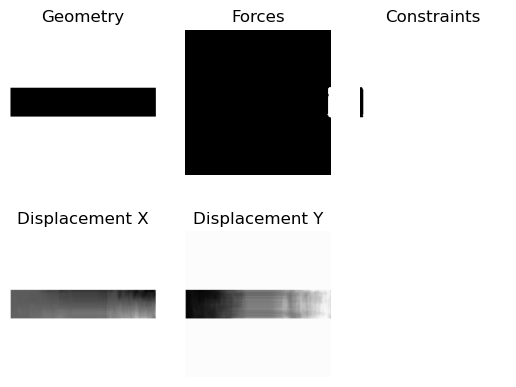

: 

In [13]:
figure = plt.figure()
figure.add_subplot(2, 3, 1)
plt.axis("off")
plt.title("Geometry")
plt.imshow(unnormalize_from_negative_one_to_one(geometry[0, 0, :, :].detach().numpy()), cmap="Greys")
figure.add_subplot(2, 3, 2)
plt.axis("off")
plt.title("Forces")
plt.imshow(unnormalize_from_negative_one_to_one(forces[0, 1, :, :].detach().numpy()), cmap="Greys")
figure.add_subplot(2, 3, 3)
plt.axis("off")
plt.title("Constraints")
plt.imshow(unnormalize_from_negative_one_to_one(constraints[0, 0, :, :].detach().numpy()), cmap="Greys")
figure.add_subplot(2, 3, 4)
plt.axis("off")
plt.title("Displacement X")
plt.imshow(prediction[0, 0, :, :].detach().numpy(), cmap="Greys")
figure.add_subplot(2, 3, 5)
plt.axis("off")
plt.title("Displacement Y")
plt.imshow(prediction[0, 1, :, :].detach().numpy(), cmap="Greys")